In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline
from visualizer import Visualizer
visualizer = Visualizer()

# Data exploration 
First of all, I need to examine the data to see what I am working with.

In [2]:
dataframe = pd.read_csv('../regression_housedata.csv', delimiter=';')

In [3]:
dataframe.shape

(999, 8)

In [4]:
dataframe.head()

,id,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
0,7129300520,3,1180,5650,1,1180,0,221900.0
1,6414100192,3,2570,7242,2,2170,400,538000.0
2,5631500400,2,770,10000,1,770,0,180000.0
3,2487200875,4,1960,5000,1,1050,910,604000.0
4,1954400510,3,1680,8080,1,1680,0,510000.0


In [5]:
dataframe.describe()

,id,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
count,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02
mean,4.506224e+09,3.349349,2051.397397,14707.242242,1.397397,1750.233233,301.164164,5.207145e+05
std,2.866822e+09,0.852367,888.351113,28975.077254,0.527057,790.466905,451.023402,3.397491e+05
min,1.150089e+07,0.000000,380.000000,649.000000,1.000000,380.000000,0.000000,8.000000e+04
25%,1.954570e+09,3.000000,1405.000000,5419.000000,1.000000,1190.000000,0.000000,3.098000e+05
50%,3.869900e+09,3.000000,1900.000000,8040.000000,1.000000,1540.000000,0.000000,4.350000e+05
75%,7.291250e+09,4.000000,2475.000000,11508.500000,2.000000,2135.000000,580.000000,6.344625e+05
max,9.828703e+09,7.000000,6070.000000,315374.000000,3.000000,6070.000000,2060.000000,3.080000e+06


In [6]:
dataframe.value_counts()

id          bedrooms  sqft_living  sqft_lot  floors  sqft_above  sqft_basement  price   
11500890    3         3130         8750      2       3130        0              843000.0    1
6204420070  4         1570         8268      1       1570        0              452000.0    1
6116500341  4         2150         23568     1       2150        0              419000.0    1
6126500060  3         2080         5969      1       1080        1000           329950.0    1
6131600060  3         1200         8316      1       1200        0              214000.0    1
                                                                                           ..
2612000390  3         1890         4838      2       1730        160            269950.0    1
2617300160  3         2020         38332     1       1010        1010           420000.0    1
2619950350  3         2090         8354      2       2090        0              403000.0    1
2621760350  4         1850         7324      2       1850        

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             999 non-null    int64  
 1   bedrooms       999 non-null    int64  
 2   sqft_living    999 non-null    int64  
 3   sqft_lot       999 non-null    int64  
 4   floors         999 non-null    int64  
 5   sqft_above     999 non-null    int64  
 6   sqft_basement  999 non-null    int64  
 7   price          999 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


<AxesSubplot: title={'center': 'Correlation matrix'}>

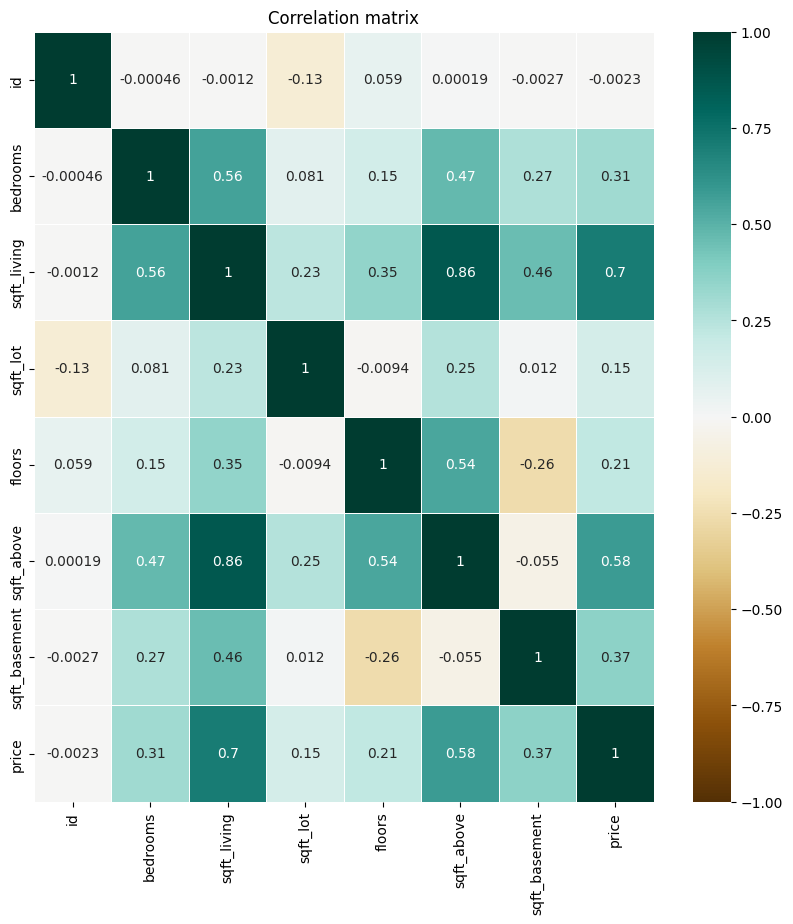

In [8]:
visualizer.corr_heatmap(data=dataframe)

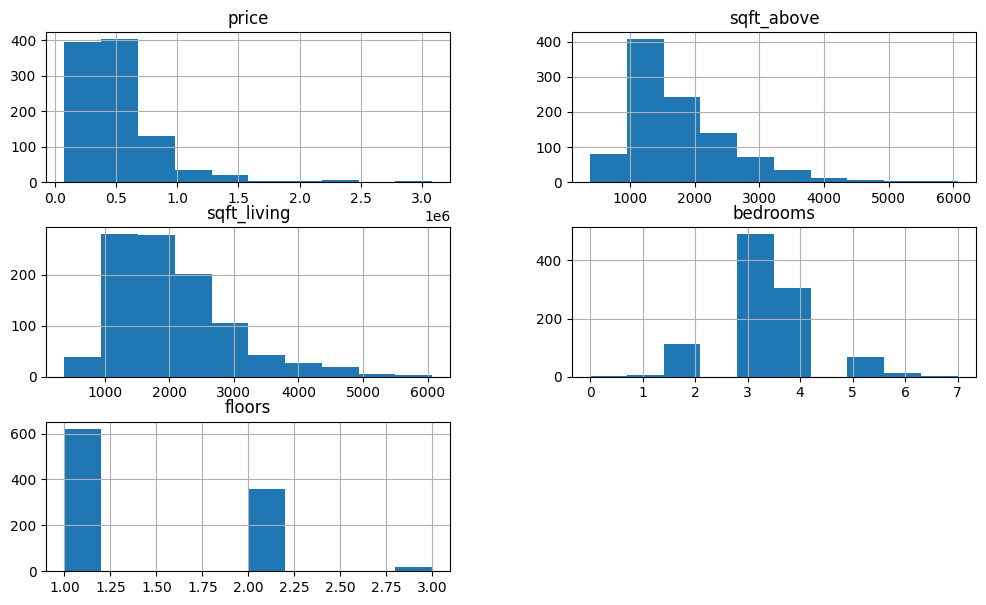

In [9]:
viz = dataframe[['price', 'sqft_above', 'sqft_living', 'bedrooms', 'floors']]
viz.hist(figsize=(12,7))
plt.show()

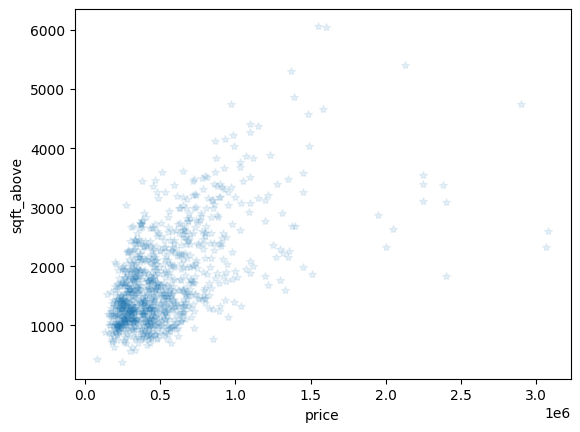

In [10]:
visualizer.make_scatter_plot(data=dataframe, para1='price', para2='sqft_above')

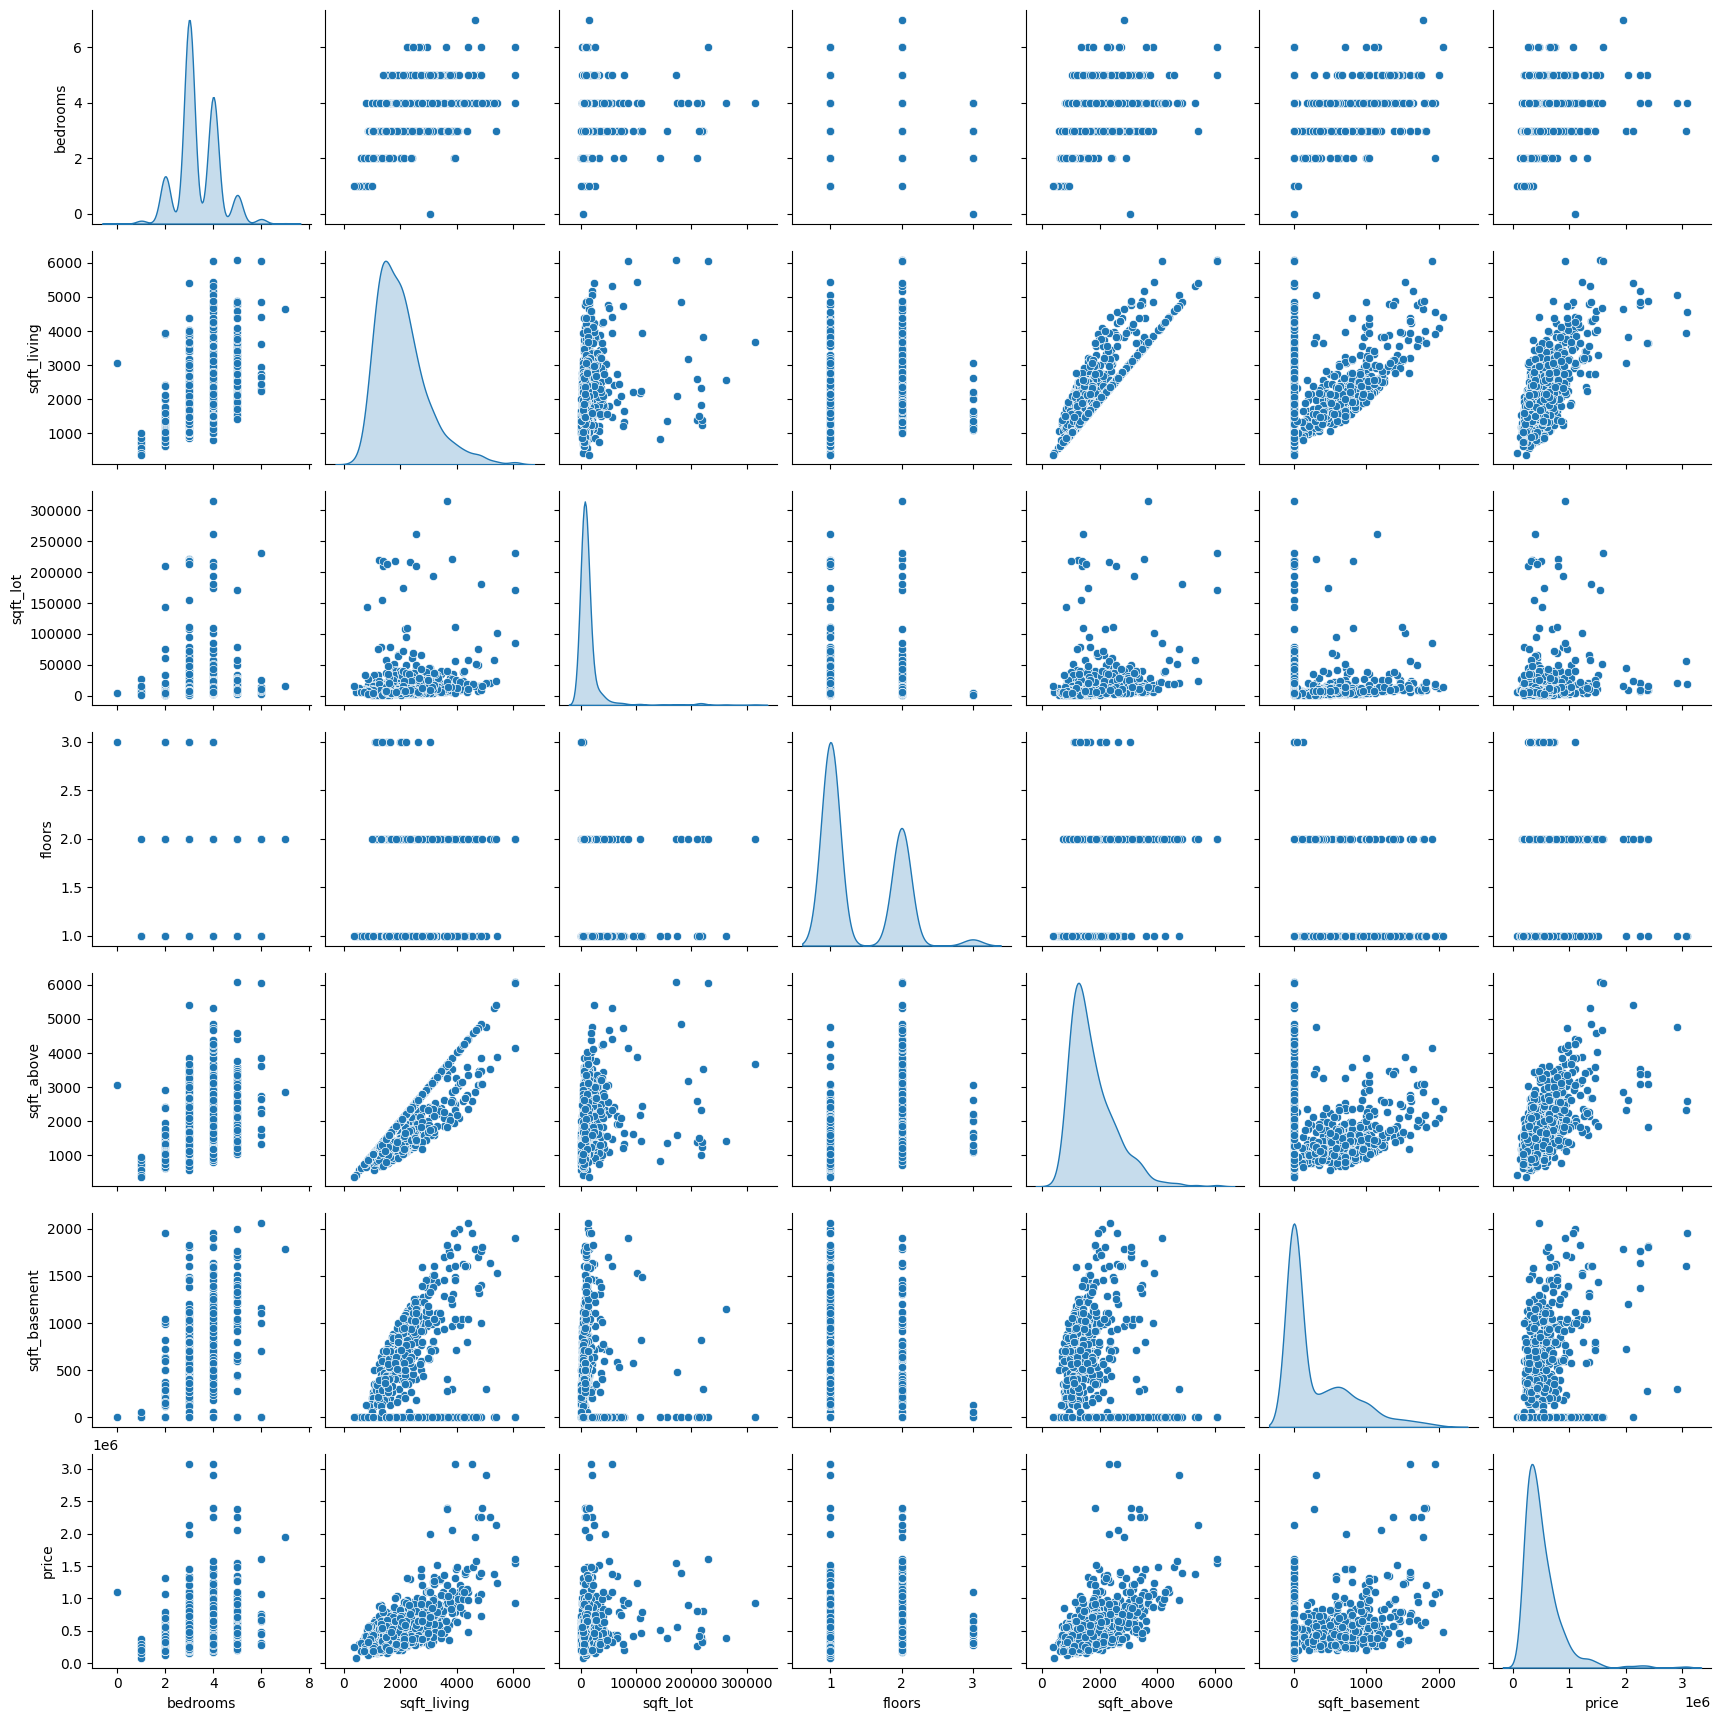

In [11]:
df_no_id = dataframe.drop(axis=1, labels=['id'])
sns.pairplot(df_no_id, diag_kind='kde')

## Discovery

The things I wanted to take a look at is the overall price range, and the correlation between our target(price) and sqft_living, sqft_above. As for the Price and sqft_living scatter - it seems to have an good linear path, the same for sqft-above(but more scattered). We can also see a linear path for bedrooms and price.
We can also see a linear path of floors to price. Which is actually decreasing, meaning when there are fewer floors, the price tends to vary more / but at its max its higher.

## Model Part

First I'll split into test and train data. I will also remove price which is the output for this set, from the train data.
I will also remove the ID from the dataset, when it will give us no value regarding prices, it is just a indicator.

Based on the information I found in the first round of investigating/discovery - I'll test our ML on all properties besides ID(which will always be excluded).
Then I might try to extract out bedroom, sqft_living and floors.


## First
I will normalize the data to make some predictors not outweigh other based on value(high and low number). When normalizing, all values will be closer to eachother, and the MLModel will do more accurate predictions.

## Second
Split into test and train data

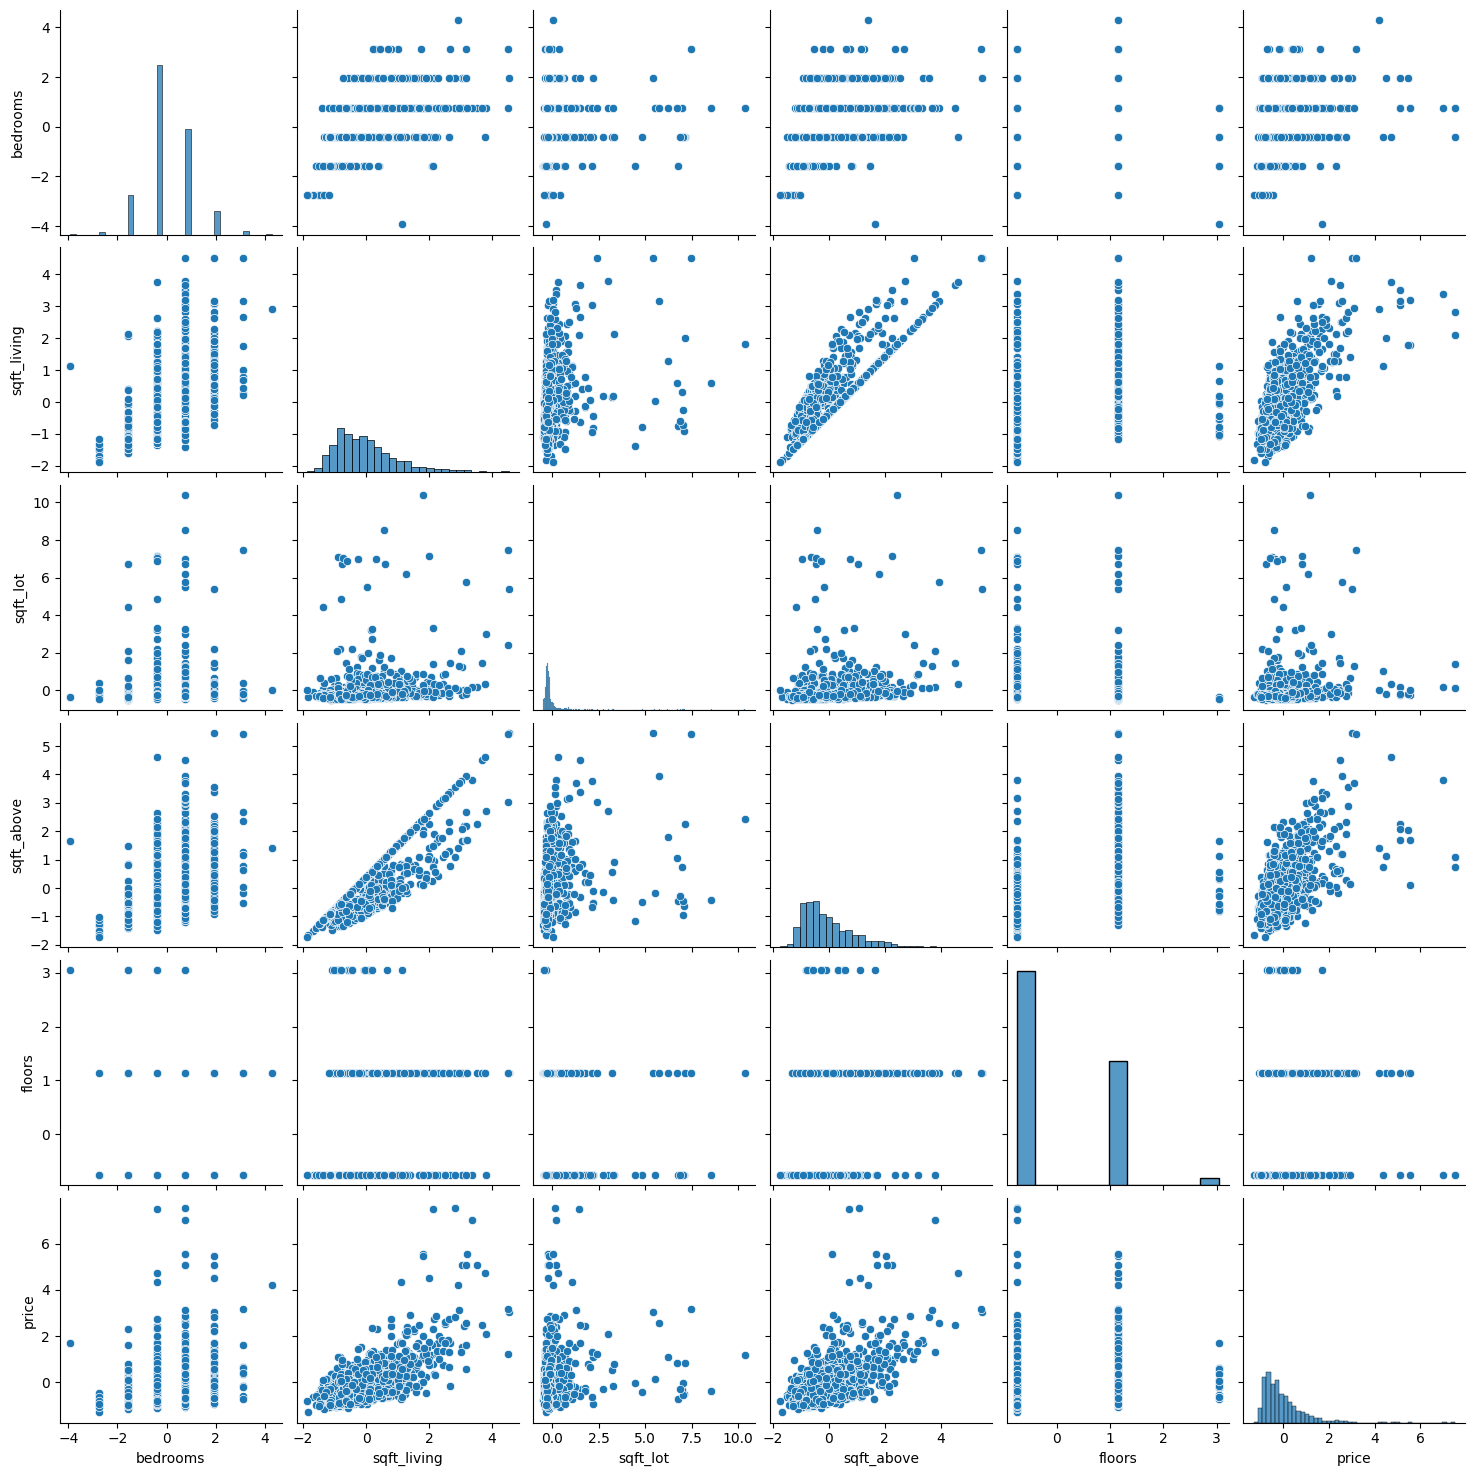

In [12]:
def mean_normalize(data: pd.DataFrame) -> pd.DataFrame:
    normalized_df = (data - data.mean()) / data.std()
    return normalized_df

df_modified = df_no_id[['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'floors', 'price']].copy()
df_modified = mean_normalize(df_modified)
sns.pairplot(data=df_modified)


In [13]:
from sklearn import preprocessing, svm

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

regression = KNeighborsRegressor(n_neighbors=3, leaf_size=19)

In [14]:
X = df_modified.drop(columns=['price'], axis=1)
y = df_modified['price']
print(X.shape)
print(y.shape)

(999, 5)
(999,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [16]:
regression.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=19, n_neighbors=3)

In [17]:
y_pred = regression.predict(X_test)

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))


# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination(r2): %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 0.51
Mean absolute error: 0.51
Coefficient of determination(r2): 0.46


# Decision Tree


In [19]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)

In [20]:
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

In [21]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, dtr_pred))

# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, dtr_pred))


# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination(r2): %.2f'
      % r2_score(y_test, dtr_pred))

Mean squared error: 0.77
Mean absolute error: 0.56
Coefficient of determination(r2): 0.19
